In [6]:
import scipy.optimize as opt
import scipy.interpolate as inter
import numpy as np
import matplotlib.pyplot as plt
from math import cos, pi

***Zadanie 1*** 

Napisz funkcję w Pythonie, która znajduje wielomian interpolacyjny dla zadanych węzłów metodą Lagrange'a. Funkcja powinna przyjmować na wejście listę argumentów oraz listę odpowiadających im wartości i zwracać wielomian jako obiekt typu funkcja.

In [2]:
def getInterpolation(x, y):
    return inter.lagrange(x, y)
    
# poly = getInterpolation([0,1] , [10, 20])
# print(poly(1))
#lambda, reduce

***Zadanie 2***

Dana jest funkcja $f(x)=\frac{1}{25x^2+1}$. Dokonaj interpolacji funkcji $f$ na przedziale $[-2,2]$ wielomianem oraz funkcjami sklejanymi 3 stopnia w:
- 21 równoodległych węzłach,
- 21 węzłach Czebyszewa.

Możesz wykorzystać funkcje [polyfit](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html) oraz [interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d).
Przedstaw otrzymane rezultaty wraz z węzłami interpolacji i funkcją $f$ na dwóch wykresach (odpowiednio dla metody Lagrange'a oraz funkcji sklejanych). Porównaj wyniki. Z jakimi problemami mamy tu do czynienia?

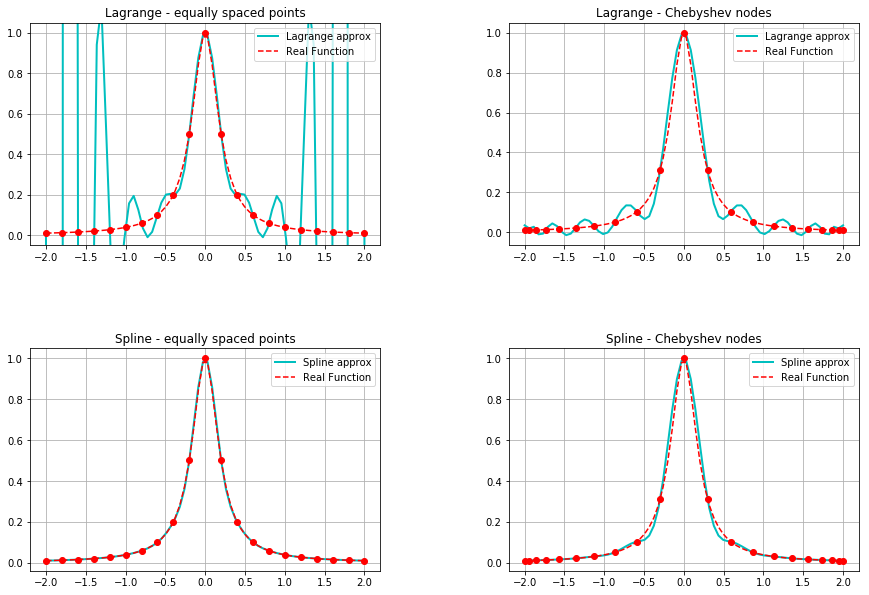

In [3]:
#Function to interpolate
def f(x):
    return 1 / (25*x**2+1)

#Returns an array of N x values between a and b to use as curve defining points
def getChebyshevNodes(a, b, n):
    return [ (a+b)/2 + (b-a)*cos((2*i - 1)/(2*n)*pi)/2 for i in range(n, 0, -1) ]

x = np.linspace(-2, 2, 70)         #Points for drawing a function 
x1 = np.linspace(-2, 2, 21)        #Equally spaced interpolation points
x2 = getChebyshevNodes(-2, 2, 21)  #Chebyshev nodes for interpolation 

y  = [f(i) for i in x ]            #Fucntion values for x
y1 = [f(i) for i in x1]            #Function values for x1
y2 = [f(i) for i in x2]            #Function values for x2

poly1 = inter.lagrange(x1, y1)     #Larange interpolation using equally spaced points
poly2 = inter.lagrange(x2, y2)     #Larange interpolation using Chebyshev nodes
poly3 = inter.CubicSpline(x1, y1)  #Cubic spline interpolation using equally spaced points
poly4 = inter.CubicSpline(x2, y2)  #Cubic spline interpolation using Chebyshev nodes

plt.subplot(221)
plt.plot(x, poly1(x), label="Lagrange approx", color='c', linewidth=2)
plt.plot(x, y, label="Real Function", linestyle='--', color='r')
plt.plot(x1, y1, 'ro')
plt.ylim(-0.05, 1.05)
plt.grid()
plt.legend()
plt.title('Lagrange - equally spaced points')

plt.subplot(222)
plt.plot(x, poly2(x), label="Lagrange approx", color='c', linewidth=2)
plt.plot(x, y, label="Real Function", linestyle='--', color='r')
plt.plot(x2, y2, 'ro')
plt.grid()
plt.legend()
plt.title('Lagrange - Chebyshev nodes')

plt.subplot(223)
plt.plot(x, poly3(x), label="Spline approx", color='c', linewidth=2)
plt.plot(x, y, label="Real Function", linestyle='--', color='r')
plt.plot(x1, y1, 'ro')
plt.grid()
plt.legend()
plt.title('Spline - equally spaced points')

plt.subplot(224)
plt.plot(x, poly4(x), label="Spline approx", color='c', linewidth=2)
plt.plot(x, y, label="Real Function", linestyle='--', color='r')
plt.plot(x2, y2, 'ro')
plt.grid()
plt.legend()
plt.title('Spline - Chebyshev nodes')

plt.tight_layout()
plt.subplots_adjust(right=2, top=2)
plt.show()

Jak widzimy używając interpolacji Lagrange'a lepsze wyniki otrzymujemy gdy interpolujemy użając węzłów Chebyshev'a niż gdy gdzielimy interpolowany przedział na równe segmenty. Odwrotnie jest z kolei gdy interpolujemy funkcjami sklejanymi.

Dzieje się tak ponieważ:
- Gdy interpolujemy wielomianem to nasze otrzymane przybliżenie jest coraz mniej dokładne im bliżej końców przedziałów i im wyższego stopnia jest ten wielomian, dlatego też gdy zamiast równo-odległych punktów użyjemy do interpolacji węzłów Chebyshev'a przybliżenie będzie dokładniejsze (punkty będą gęściej położone przy końcach przedziałów - co widać na wykresach)
- Natomiast gdy używamy interpolacji funkcjami sklejanymi, interpolujemy wielomianem odcinki pomiędzy punktami, w tym przpadku wielomianem trzeciego stopnia, dzięki czemu pozbywamy się problemu bardzo niestabilnej wartości wielonów duzego stopnia (patrz wykres 1: "Larange - equally spaced points") i w takiej sytuacji użycie węzłów Chebyshev'a zamiast równo-odległych punktów tylko niepotrzebnie pogarsza dokładność interpolacji pomiędzy odleglejszymi węzłami (w środku interpolowanego przedziału)

***Zadanie 3***

W poniższej tabeli przedstawione zostały wyniki pomiarów prędkości obrotowej silnika prądu stałego w zależności od napięcia jego zasilania. Dokonaj interpolacji wielomianowej charakterystyki i porównaj jej wyniki z aproksymacją wielomianami 1, 2 i 3 stopnia.

|napięcie \[V\]|prędkość obrotowa \[1000 RPM\]|napięcie \[V\]|prędkość obrotowa \[1000 RPM\]|napięcie \[V\]|prędkość obrotowa \[1000 RPM\]
|--|--|--|--|--|--|
| -10.0| -9.10| -3.0| -3.65| 4.0| 4.61|
| -9.0| -8.82| -2.0| -2.52| 5.0| 5.51|
| -8.0| -7.99| -1.0| -1.28| 6.0| 6.32|
| -7.0| -7.10| 0.0| 0.00| 7.0| 7.10|
| -6.0| -6.32| 1.0| 1.26| 8.0| 7.81|
| -5.0| -5.33| 2.0| 2.49| 9.0| 8.45|
| -4.0| -4.73| 3.0| 3.61| 10.0| 9.02|

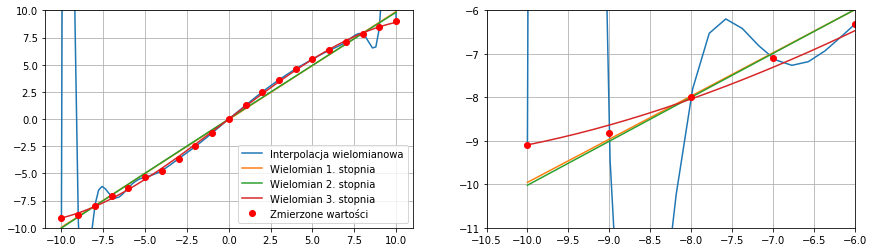

In [4]:
x  = np.linspace(-10, 10, 100)
x1 = range(-10, 11)

y1 = [-9.1, -8.82, -7.99, -7.1, -6.32, -5.33, -4.73, -3.65, -2.52, -1.28, 
      0, 1.26, 2.49, 3.61, 4.61, 5.51, 6.32, 7.1, 7.81, 8.45, 9.02]
poly = inter.lagrange(x1, y1)
poly1 = np.poly1d( np.polyfit(x1, y1, 1) )
poly2 = np.poly1d( np.polyfit(x1, y1, 2) )
poly3 = np.poly1d( np.polyfit(x1, y1, 3) )

plt.subplot(121)
plt.plot(x, poly(x), label="Interpolacja wielomianowa")
plt.plot(x, poly1(x), label="Wielomian 1. stopnia")
plt.plot(x, poly2(x), label="Wielomian 2. stopnia")
plt.plot(x, poly3(x), label="Wielomian 3. stopnia")
plt.plot(x1, y1, "ro", label="Zmierzone wartości")
plt.ylim(-10,10)
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(x, poly(x))
plt.plot(x, poly1(x))
plt.plot(x, poly2(x))
plt.plot(x, poly3(x))
plt.plot(x1, y1, "ro")
plt.ylim(-11, -6)
plt.xlim(-10.5, -6)
plt.grid()

plt.subplots_adjust(right=2)
plt.show()


- Najelpszy wynik otrzymaliśmy podczas interpolacji wielomianem trzeciego stopnia (nie przechodzi on *dokładnie* przez wszystkie punkty interpolacji tak jak wielomian z interpolacji Lagrange'a, ale za to jego wartości na krańcach przedziału są stabilne
- Najgorsza interpolacja otrzymana została w wyniku użycia metody Lagrange'a, wielomian 19 stopnia jest niestabilny na krańcach przedziału

***Zadanie 4***

Kierowca jadący z miasta A do miasta B, zauważywszy na drodze fotoradar, zaczął gwałtownie hamować. Przebieg jego położenia, zarejestrowanego przez nawigację, przedstawiony jest w poniższej tabeli. Wiedząc, że radar znajduje się w punkcie o współrzędnej 79.6 m, oszacuj kiedy kierowca minął fotoradar oraz z jaką prędkością wtedy jechał.

|czas \[s\]|położenie \[m\]|
|--|--|
|0.0|0.0|
|1.0|42.7|
|2.0|73.2|
|3.0|92.5|


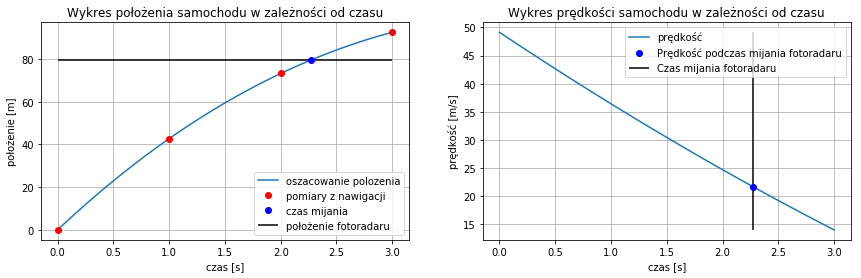

Kierowca minął fotoradar po 2.2758s z prędkością 21.682m/s


In [42]:
x1 = [0, 1, 2, 3]
y1 = [0, 42.7, 73.2, 92.5]

x = np.linspace(0, 3)
location_poly = np.poly1d( np.polyfit(x1, y1, len(x1)-1) )
y = location_poly(x)

#Finding t where y(t) = 79.6
t0 = opt.bisect(location_poly - 79.6, 0, 3) #Time when driver passed the speed camera

speed_poly = location_poly.deriv()
ys = speed_poly(x)

plt.subplot(121)
plt.title("Wykres położenia samochodu w zależności od czasu")
plt.plot(x, y, label="oszacowanie polozenia")
plt.plot(x1, y1, "ro", label="pomiary z nawigacji")
plt.plot(t0, location_poly(t0), "bo", label="czas mijania")
plt.hlines(79.6, 0, 3, label="położenie fotoradaru")
plt.xlabel("czas [s]")
plt.ylabel("położenie [m]")
plt.legend(loc="lower right")
plt.grid()

plt.subplot(122)
plt.title("Wykres prędkości samochodu w zależności od czasu")
plt.plot(x, ys, label="prędkość")
plt.plot(t0, speed_poly(t0), "bo", label="Prędkość podczas mijania fotoradaru")
plt.vlines(t0, ys[-1], ys[0], label="Czas mijania fotoradaru")
plt.xlabel("czas [s]")
plt.ylabel("prędkość [m/s]")
plt.legend()
plt.grid()

plt.subplots_adjust(right=2)
plt.show()

print("Kierowca minął fotoradar po {:.5}s z prędkością {:.5}m/s".format(t0, speed_poly(t0)))